<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/ML%20for%20finance/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capital Asset Pricing Model (CAPM)
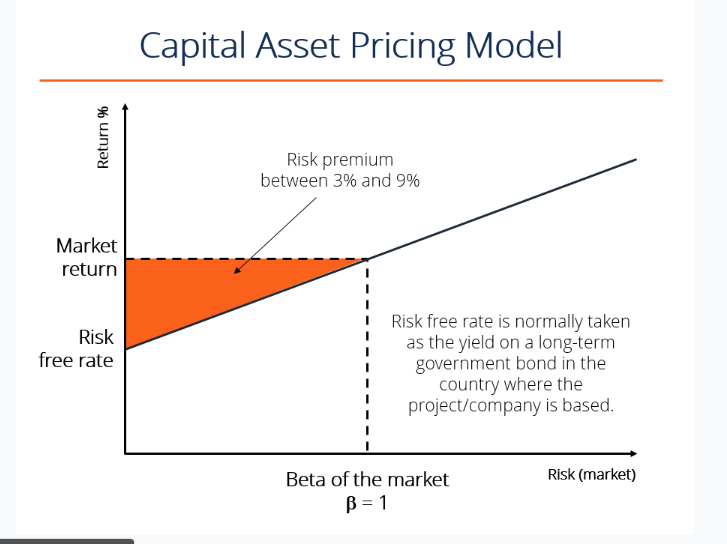

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [2]:
url='https://raw.githubusercontent.com/Ajay-user/ML-DL-RL-repo/master/ML%20for%20finance/stock.csv'
df = pd.read_csv(url)
df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


## Process the data

In order to perform further operations on the data we have to normalize the prices based on the initial price.

In [3]:
def normalize_the_price(df):
  """normalize the prices based on the initial price
  """
  historic_data = df.iloc[:,1:].copy()
  start = df.iloc[0,1:]

  return historic_data/start


In [4]:
df_norm = normalize_the_price(df)
df_norm.head()


,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.996251,0.987949,0.99834,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,1.007855,0.996424,1.004316,1.009893,1.03257,0.996954,0.941593,0.998317,0.998587
3,1.01832,0.99404,1.006972,1.049464,1.076792,1.00288,0.949027,1.005193,1.00968
4,1.015093,1.000662,1.00996,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666


## Analysis

Randomly allocating prices for the assets 

**context:**

Lets suppose that one of our client had invested 10,000,00$ in a portfolio

Securites :` [AAPL, BA, T, MGM, AMZN, IBM, TSLA, GOOG, SP500]`

Time-span `2012–2020`

Did the random allocation resulted in big time winning or lose of the money ? 

Lets do some analysis using the historic data. We don't know the optimal allocation percentage, this is a simulation and we are experimenting so lets not sweat and use random values.

In [5]:
# These are our random weigths
Weights = np.random.random(len(df.columns[1:]))
# These Weights should sum to one
Weights = Weights/sum(Weights)
Weights

array([0.07700347, 0.12897685, 0.19498728, 0.04559854, 0.1371354 ,
       0.0171478 , 0.01323612, 0.18935382, 0.19656072])

In [6]:
# Historic data -- normalized based on initial price
X = df_norm.values
print('Shape of historic data',X.shape)

Shape of historic data (2159, 9)


**Σweight*security**

In [7]:
portfolio_daily_worth = X@Weights

print('Shape of matrix multiplication',portfolio_daily_worth.shape)

Shape of matrix multiplication (2159,)


In [8]:
df['portfolio daily worth in $'] = portfolio_daily_worth*10_00_000
df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000,1000000.0
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966,995539.981764
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044,1004481.076409
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039,1017048.694373
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000,1025312.579108


In [62]:
# lets graph the protfolio daily worth 
import plotly.express as px

fig = px.line(x='Date', y='portfolio daily worth in $', data_frame=df, title = 'portfolio daily worth in $')
fig.show()


## CAPM 

The expected return on a stock, using the Capital Asset Pricing Model (CAPM) formula.

The CAPM formula is used for calculating the expected returns of an asset.  It is based on the idea of systematic risk (otherwise known as non-diversifiable risk) that investors need to be compensated for in the form of a risk premium. A risk premium is a rate of return greater than the risk-free rate. When investing, investors desire a higher risk premium when taking on more risky investments.

**The following information about a stock is known:**
* It trades on the NYSE and its operations are based in the United States
* Current yield on a U.S. 10-year treasury is 2.5%

### Stocks daily return

You may calculate daily stock returns to monitor the magnitude of this change. The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price. A positive return means the stock has grown in value, while a negative return means it has lost value.

In [9]:
def get_stock_daily_return(df):
  h = df.copy()
  h_shifted = h.shift().fillna(0)
  # Calculate the percentage of change from the previous day
  r = ((h - h_shifted)/h_shifted)*100
  r.iloc[0] = 0
  return r.astype(np.float64)

In [10]:
stocks_daily_return = get_stock_daily_return(df_norm)
stocks_daily_return

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...
2154,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


### Expected return of a stock

Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

beta represents the slope of the line regression line (market return vs. stock return). 

Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 

Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 

Beta < 1, indicates that the security is theoretically less volatile than the market. If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.

Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
Tech stocks generally have higher betas than S&P500 but they also have excess returns


In [11]:
# Select any stock, let's say Apple 
apple = stocks_daily_return['AAPL'] 
apple

0       0.000000
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [12]:
# Market
market = stocks_daily_return['sp500']
market

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

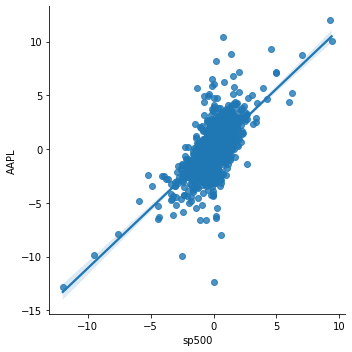

In [13]:
sns.lmplot(x='sp500',y='AAPL',data=stocks_daily_return);

#### Beta

In [14]:
# from the historic data lets find out value for beta 
slope, y_intercept = np.polyfit(market, apple, deg=1) 
# beta is the slope of the line
beta = slope
print('Beta for AAPL stock',beta)

Beta for AAPL stock 1.1128924148678097


#### Market return

In [15]:
# Market return
# average daily rate of return for S&P500
print('Mean of market daily return',market.mean())

# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Apart from the weekends, there are other holidays.

rm = stocks_daily_return['sp500'].mean() * 252

print('Annualized rate of return for S&P500 ',rm)

Mean of market daily return 0.04931600660038922
Annualized rate of return for S&P500  12.427633663298083


#### Risk free return

In [16]:
# Current yield on a U.S. 10-year treasury is 2.5%
rf = 0.025

#### CAPM formula

In [17]:
# CAPM
# Expected return = Risk Free Rate + [Beta * Market Risk Premium]
return_apple = rf + beta*(rm-rf)
print('Expected return of apple : ',return_apple)

Expected return of apple :  13.827796928268592


## Expected Return Calculation


### Portfolio

We have select different securities to diversify the risk.

Asset allocation refers to an investment strategy in which individuals divide their investment portfolios between different diverse asset classes to minimize investment risks.

In [18]:
stocks = stocks_daily_return.columns.values[:-1]
stocks

array(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG'],
      dtype=object)

### Average annual market return

In [19]:
# Annual average return of the Market 
# Out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Apart from the weekends, there are other holidays.
rm = stocks_daily_return['sp500'].mean()*252
print('Average market return : ',rm)

Average market return :  12.427633663298083


### Risk free return

In [20]:
rf = 0.025

### Beta

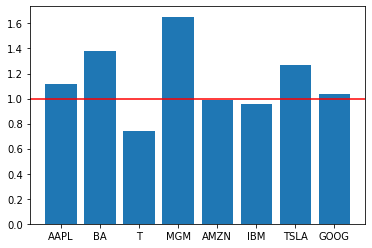

In [21]:
beta = {}
for stock in stocks:
  security = stocks_daily_return[stock]
  market = stocks_daily_return['sp500']
  slope, y_intercept = np.polyfit(market, security, deg=1) 
  beta[stock]=slope

plt.bar(beta.keys(),beta.values());
plt.axhline(y=1.0, c='r');


### Expected Return

In [22]:
expected_return = {}

for stock in stocks:
   er = rf+(beta[stock]*(rm-rf))
   expected_return[stock] = er

expected_return

{'AAPL': 13.827796928268592,
 'AMZN': 12.325120578537051,
 'BA': 17.17619530010068,
 'GOOG': 12.860259462543615,
 'IBM': 11.936674353150185,
 'MGM': 20.533594501402906,
 'T': 9.26036498686519,
 'TSLA': 15.759167230150451}

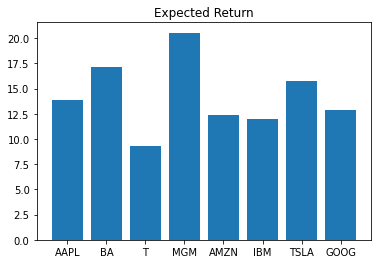

In [23]:
plt.bar(expected_return.keys(),expected_return.values());
plt.title('Expected Return');

### Portfolio expected return

Lets find out the expected return of the portfolio, assume we assign equal weights to all the securitites.

In [25]:
# Lets see the securities in the portfolio
print([stock for stock in stocks])

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']


In [27]:
# Lets assign equal weights to all of them
weight = 1/len(stocks)
weights = weight*np.ones(len(stocks))

print(weights)

[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


In [43]:
# Expected return of the portfolio
expected_return_of_the_portfolio = np.dot(np.array(list(expected_return.values())), weights)
print('Expected return of the portfolio : ',expected_return_of_the_portfolio)

Expected return of the portfolio :  14.209896667627333
